# Credit Card Application

Banks and financial institutions often need to predict customer behavior, such as the likelihood of a customer accepting a loan offer, to target their marketing efforts effectively. This helps in increasing the acceptance rate of their offers while reducing marketing costs.

Our objective is to create a model that forecasts the propensity (probability) of customers responding to a personal loan campaign, we will utilize logistic regression. The outcomes will be categorized, and the factors influencing the answer will be found using the model's probability. Building a model that identifies clients who are most likely to accept the loan offer in upcoming personal loan campaigns is the objective.

We import necessary libraries to handle data manipulation, visualization, and model building. These libraries provide functions to simplify complex operations, ensuring efficient data processing and analysis.

# Grading Scheme:

1. **Importing Libraries and Data (10 points)**
   - Correctly import all required libraries; remove any unncessary libraries: 5 points
   - Correctly read the dataset: 5 points

2. **Data Exploration (20 points)**
   - Correctly display dimensions, first and last entries: 10 points
   - Correctly display descriptive statistics: 10 points

3. **Handling Missing Values (20 points)**
   - Correctly impute missing numeric values: 10 points
   - Correctly impute missing non-numeric values: 10 points

4. **Data Pre-processing (20 points)**
   - Correctly encode non-numeric data: 10 points
   - Correctly plot histograms and heatmap: 10 points

5. **Model Building (30 points)**
   - Correctly split data into train and test sets: 10 points
   - Correctly scale the data: 10 points
   - Correctly build and fit the logistic regression model: 10 points

6. **Model Evaluation (30 points)**
   - Correctly calculate and display confusion matrix: 10 points
   - Correctly calculate and plot the ROC curve: 20 points
 
7. **Answering Red Questions**
   - Correctly answer all subjective questions in red: 20 points


Total: 150 points

## 1. Importing Libraries

In [3]:
# KEEP ONLY THE REQUIRED LIBRARIES; REMOVE OTHERS

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix


from sklearn.metrics import roc_curve
from scipy.stats import chi2_contingency
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

## <span style="color:red">*Q1. Why only the required libraries are kept in the code?*</span>

Only keeping the required libraries makes sure that there are no unnecessary memory usages and also could ensure clarity in the code.

## 2) Importing and Descriptive Stats

To market their loan products to people who already have deposit accounts, BankABC wants to create a direct marketing channel. To cross-sell personal loans to its current clients, the bank ran a test campaign. An enticing personal loan offer and processing charge waiver were aimed at a random group of 20000 clients. The targeted clients' information has been provided, together with information on how they responded to the marketing offer.

In [4]:
# READ DATA 
data = pd.read_excel("Approval.xlsx")
data.head()

,Gender,Age,Debt,Married,BankCustomer,Industry,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Citizen,ZipCode,Income,Approved
0,1,30.83,0.000,1,1,Industrials,White,1.25,1,1,1,0,ByBirth,202,0,1
1,0,58.67,4.460,1,1,Materials,Black,3.04,1,1,6,0,ByBirth,43,560,1
2,0,24.50,0.500,1,1,Materials,Black,1.50,1,0,0,0,ByBirth,280,824,1
3,1,27.83,1.540,1,1,Industrials,White,3.75,1,1,5,1,ByBirth,100,3,1
4,1,20.17,5.625,1,1,Industrials,White,1.71,1,0,0,0,ByOtherMeans,120,0,1


**Instructions:**
1. Get the dimensions of the array and print them.
2. Verify if the correct dataset was imported by checking the first 15 entries.
3. Verify by checking the last five entries.
4. Display descriptive statistics of the dataset.

In [5]:
# GETTING THE DIMENSIONS OF THE ARRAY
dimensions = data.shape
print(dimensions)

(690, 16)


In [6]:
# VERIFYING IF WE IMPORTED THE RIGHT DATASET BY CHECKING THE FIRST 15 ENTRIES OF THE DATA
data.head(15)

,Gender,Age,Debt,Married,BankCustomer,Industry,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Citizen,ZipCode,Income,Approved
0,1,30.83,0.000,1,1,Industrials,White,1.250,1,1,1,0,ByBirth,202,0,1
1,0,58.67,4.460,1,1,Materials,Black,3.040,1,1,6,0,ByBirth,43,560,1
2,0,24.50,0.500,1,1,Materials,Black,1.500,1,0,0,0,ByBirth,280,824,1
3,1,27.83,1.540,1,1,Industrials,White,3.750,1,1,5,1,ByBirth,100,3,1
4,1,20.17,5.625,1,1,Industrials,White,1.710,1,0,0,0,ByOtherMeans,120,0,1
5,1,32.08,4.000,1,1,CommunicationServices,White,2.500,1,0,0,1,ByBirth,360,0,1
6,1,33.17,1.040,1,1,Transport,Black,6.500,1,0,0,1,ByBirth,164,31285,1
7,0,22.92,11.585,1,1,InformationTechnology,White,0.040,1,0,0,0,ByBirth,80,1349,1
8,1,54.42,0.500,0,0,Financials,Black,3.960,1,0,0,0,ByBirth,180,314,1
9,1,42.50,4.915,0,0,Industrials,White,3.165,1,0,0,1,ByBirth,52,1442,1


In [7]:
# VERIFYING IF WE IMPORTED THE RIGHT DATASET BY CHECKING THE LAST FIVE ENTRIES OF THE DATA
data.tail(5)

,Gender,Age,Debt,Married,BankCustomer,Industry,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Citizen,ZipCode,Income,Approved
685,1,21.08,10.085,0,0,Education,Black,1.25,0,0,0,0,ByBirth,260,0,0
686,0,22.67,0.750,1,1,Energy,White,2.00,0,1,2,1,ByBirth,200,394,0
687,0,25.25,13.500,0,0,Healthcare,Latino,2.00,0,1,1,1,ByBirth,200,1,0
688,1,17.92,0.205,1,1,ConsumerStaples,White,0.04,0,0,0,0,ByBirth,280,750,0
689,1,35.00,3.375,1,1,Energy,Black,8.29,0,0,0,1,ByBirth,0,0,0


In [8]:
# DESCRIPTIVE STATS
data.describe()

,Gender,Age,Debt,Married,BankCustomer,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,ZipCode,Income,Approved
count,690.000000,690.000000,690.000000,690.000000,690.000000,690.000000,690.000000,690.000000,690.00000,690.000000,690.000000,690.000000,690.000000
mean,0.695652,31.514116,4.758725,0.760870,0.763768,2.223406,0.523188,0.427536,2.40000,0.457971,180.547826,1017.385507,0.444928
std,0.460464,11.860245,4.978163,0.426862,0.425074,3.346513,0.499824,0.495080,4.86294,0.498592,173.970323,5210.102598,0.497318
min,0.000000,13.750000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,22.670000,1.000000,1.000000,1.000000,0.165000,0.000000,0.000000,0.00000,0.000000,60.000000,0.000000,0.000000
50%,1.000000,28.460000,2.750000,1.000000,1.000000,1.000000,1.000000,0.000000,0.00000,0.000000,160.000000,5.000000,0.000000
75%,1.000000,37.707500,7.207500,1.000000,1.000000,2.625000,1.000000,1.000000,3.00000,1.000000,272.000000,395.500000,1.000000
max,1.000000,80.250000,28.000000,1.000000,1.000000,28.500000,1.000000,1.000000,67.00000,1.000000,2000.000000,100000.000000,1.000000


In [9]:
# DESCRIPTIVE STATS
print(data.describe)

<bound method NDFrame.describe of      Gender    Age    Debt  Married  BankCustomer         Industry Ethnicity  \
0         1  30.83   0.000        1             1      Industrials     White   
1         0  58.67   4.460        1             1        Materials     Black   
2         0  24.50   0.500        1             1        Materials     Black   
3         1  27.83   1.540        1             1      Industrials     White   
4         1  20.17   5.625        1             1      Industrials     White   
..      ...    ...     ...      ...           ...              ...       ...   
685       1  21.08  10.085        0             0        Education     Black   
686       0  22.67   0.750        1             1           Energy     White   
687       0  25.25  13.500        0             0       Healthcare    Latino   
688       1  17.92   0.205        1             1  ConsumerStaples     White   
689       1  35.00   3.375        1             1           Energy     Black   

     

## 3) Handling Missing Values

Missing values in the dataset can lead to incorrect analysis and model predictions. Imputing missing values ensures the integrity of the dataset, making it possible to build reliable models.

**Instructions:**
1. Check for missing values.
2. Impute missing values for numeric data using the mean and for non-numeric data using the mode.

In [10]:
# CHECK FOR MISSING VALUES
missing_values = data.isnull().sum()
print(missing_values)

Gender            0
Age               0
Debt              0
Married           0
BankCustomer      0
Industry          0
Ethnicity         0
YearsEmployed     0
PriorDefault      0
Employed          0
CreditScore       0
DriversLicense    0
Citizen           0
ZipCode           0
Income            0
Approved          0
dtype: int64


In [11]:
# IMPUTE MISSING VALUES
# for numeric data using mean
data.fillna(data.mean(numeric_only = True), inplace = True)

In [12]:
for colume in ["Industry", "Ethnicity", "Citizen"]:
    data[colume] = data[colume].fillna(data[colume].mode()[0])

In [13]:
data.head(10)

,Gender,Age,Debt,Married,BankCustomer,Industry,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Citizen,ZipCode,Income,Approved
0,1,30.83,0.000,1,1,Industrials,White,1.250,1,1,1,0,ByBirth,202,0,1
1,0,58.67,4.460,1,1,Materials,Black,3.040,1,1,6,0,ByBirth,43,560,1
2,0,24.50,0.500,1,1,Materials,Black,1.500,1,0,0,0,ByBirth,280,824,1
3,1,27.83,1.540,1,1,Industrials,White,3.750,1,1,5,1,ByBirth,100,3,1
4,1,20.17,5.625,1,1,Industrials,White,1.710,1,0,0,0,ByOtherMeans,120,0,1
5,1,32.08,4.000,1,1,CommunicationServices,White,2.500,1,0,0,1,ByBirth,360,0,1
6,1,33.17,1.040,1,1,Transport,Black,6.500,1,0,0,1,ByBirth,164,31285,1
7,0,22.92,11.585,1,1,InformationTechnology,White,0.040,1,0,0,0,ByBirth,80,1349,1
8,1,54.42,0.500,0,0,Financials,Black,3.960,1,0,0,0,ByBirth,180,314,1
9,1,42.50,4.915,0,0,Industrials,White,3.165,1,0,0,1,ByBirth,52,1442,1


## <span style="color:red">*Q2. Is there any missing data at all?*</span>

From my code the data set doesn't seem to have any missing values


## <span style="color:red">*Q3. Why do we impute mean for numeric and mode for non-numeric data?*</span>

Using the mean for numeric values assures that that missing data does not really affect the resulting model (assuming that the distributon is not significantly skewed), we use mode for non-numeric data because we are unable to compute the mean.

## 4) Data Preprocessing

Data preprocessing is crucial for preparing raw data for analysis. Converting non-numeric data to numeric forms, such as one-hot encoding, ensures compatibility with machine learning algorithms, which typically require numerical input.

In [14]:
# CONVERTING ALL NON-NUMERIC DATA TO NUMERIC - USING ONE-HOT ENCODING

# INSTANTIATE LABELENCODER

# USE LABEL ENCODER le TO TRANSFORM VARIABLES
# Creating a new DataFrame for storing transformed data
data_transformed = pd.DataFrame()

# Loop through columns
for column in data.columns:

    if data[column].dtypes == 'object':
        ohe = OneHotEncoder(sparse_output = False)
        # One-hot encode the categorical column
        encoded = ohe.fit_transform(data[[column]])
        
        #Set the column name of one-hot encoded DataFrame as column_value
        column_value = ohe.get_feature_names_out([column])
        
        # Concatenate to the transformed DataFrame
        encoded_df = pd.DataFrame(encoded, columns=column_value)
        data_transformed = pd.concat([data_transformed, encoded_df], axis=1)
    else:
        # Copy numeric columns as-is
        data_transformed[column] = data[column].values


data = data_transformed

data.head(10)

,Gender,Age,Debt,Married,BankCustomer,Industry_CommunicationServices,Industry_ConsumerDiscretionary,Industry_ConsumerStaples,Industry_Education,Industry_Energy,...,PriorDefault,Employed,CreditScore,DriversLicense,Citizen_ByBirth,Citizen_ByOtherMeans,Citizen_Temporary,ZipCode,Income,Approved
0,1,30.83,0.000,1,1,0.0,0.0,0.0,0.0,0.0,...,1,1,1,0,1.0,0.0,0.0,202,0,1
1,0,58.67,4.460,1,1,0.0,0.0,0.0,0.0,0.0,...,1,1,6,0,1.0,0.0,0.0,43,560,1
2,0,24.50,0.500,1,1,0.0,0.0,0.0,0.0,0.0,...,1,0,0,0,1.0,0.0,0.0,280,824,1
3,1,27.83,1.540,1,1,0.0,0.0,0.0,0.0,0.0,...,1,1,5,1,1.0,0.0,0.0,100,3,1
4,1,20.17,5.625,1,1,0.0,0.0,0.0,0.0,0.0,...,1,0,0,0,0.0,1.0,0.0,120,0,1
5,1,32.08,4.000,1,1,1.0,0.0,0.0,0.0,0.0,...,1,0,0,1,1.0,0.0,0.0,360,0,1
6,1,33.17,1.040,1,1,0.0,0.0,0.0,0.0,0.0,...,1,0,0,1,1.0,0.0,0.0,164,31285,1
7,0,22.92,11.585,1,1,0.0,0.0,0.0,0.0,0.0,...,1,0,0,0,1.0,0.0,0.0,80,1349,1
8,1,54.42,0.500,0,0,0.0,0.0,0.0,0.0,0.0,...,1,0,0,0,1.0,0.0,0.0,180,314,1
9,1,42.50,4.915,0,0,0.0,0.0,0.0,0.0,0.0,...,1,0,0,1,1.0,0.0,0.0,52,1442,1


## 5) Data Visualization

**Instructions:**
1. Plot histograms for all variables to understand their distributions.
2. Calculate the correlation matrix and plot the heatmap to identify relationships between variables.

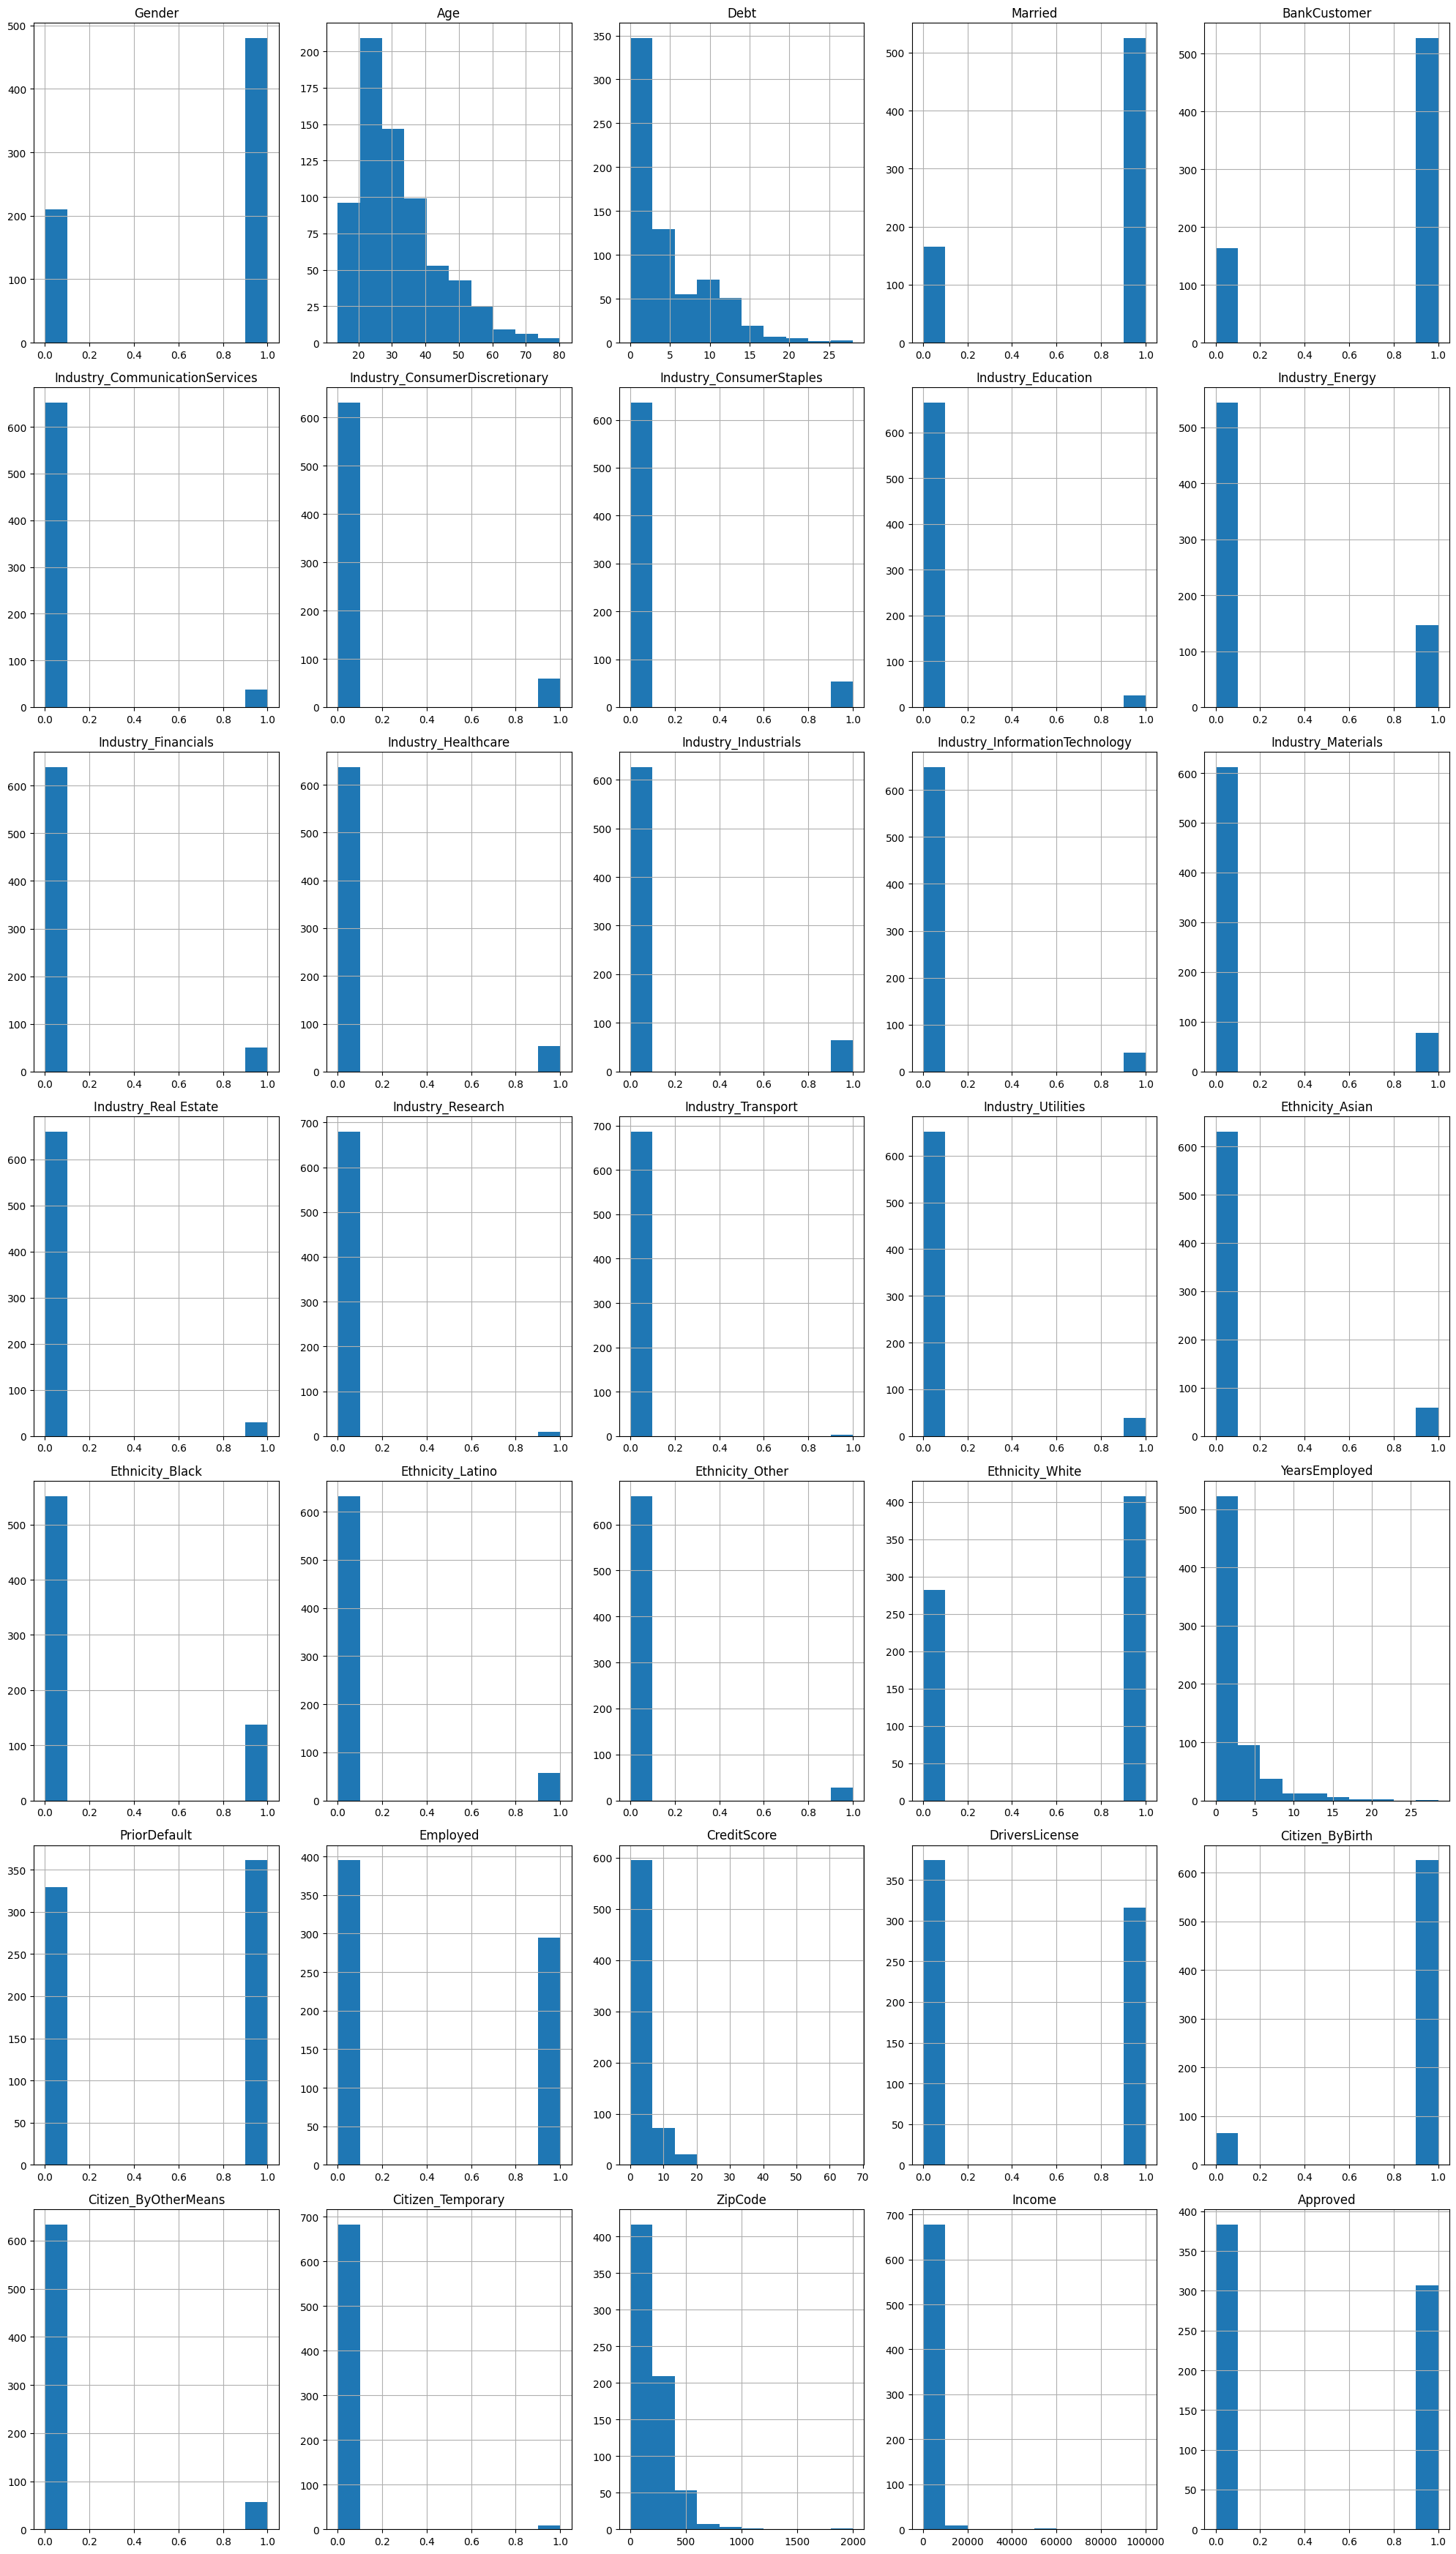

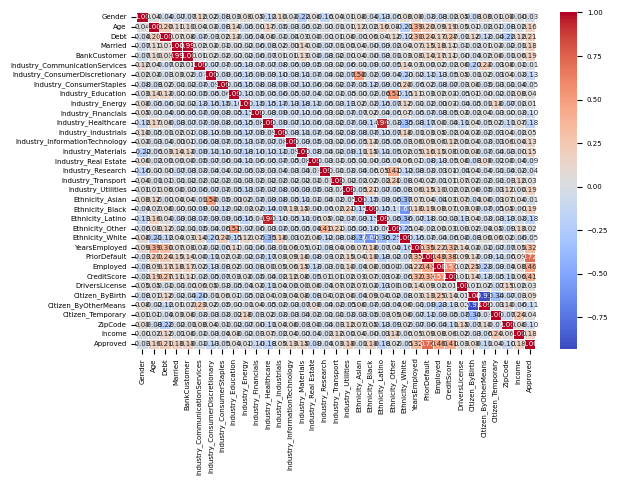

In [15]:
# PLOTTING HISTOGRAMS FOR ALL VARIABLES
# Define number of plots per row
fig, axes = plt.subplots(7, 5, figsize=(20, 5 * 7))
axes = axes.flatten()  # Flatten 2D array of axes for easy looping

for i, column in enumerate(data.columns):
    axes[i].hist(data[column].dropna())
    axes[i].set_title(column)
    axes[i].tick_params(axis='x')
    axes[i].tick_params(axis='y')
    axes[i].grid(True)

plt.tight_layout()
plt.show()
    
# CALCULATE THE CORRELATION MATRIX
corr_matrix = data.corr()
plt.figure()


# Decrease font size
plt.rcParams['font.size'] = 5

# PLOT THE HEATMAP
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.tight_layout()
plt.show()



## <span style="color:red">*Q4. What do the histograms for all variables look like?*</span>

Many of the histogram looks like they are from binary variables (which is true because of one-hot encoding) and for those that are not binary, they all seems to be significantly skewed to the right.

## <span style="color:red">*Q5. What does the correlation matrix and heatmap reveal about relationships between variables?*</span>
They show some hidden relationships between predictors that are highly correlated and might call for deeper digging, these graphs could also reveal the "useless" variables that are not essential for making predictions and hence should not be included in the model.

## 6) Model Building

Model building involves training a machine learning model to make predictions based on historical data. In this case, we are predicting the likelihood of a credit card application being approved. Splitting the data into training and testing sets ensures that we can evaluate the model's performance on unseen data, providing a realistic assessment of its accuracy.

In [16]:
# DROP THE VARIABLES NOT NEEDED
columns_to_drop = ["Gender","DriversLicense", "ZipCode", "Income"]

for column in data.columns:
    if column in columns_to_drop:
        data = data.drop(columns=column)
        
# SEGREGATE FEATURES AND LABELS INTO SEPARATE VARIABLES
features = data.drop('Approved', axis=1)  # Features
target = data['Approved']

# SPLIT INTO TRAIN AND TEST USING TRAIN_TEST_SPLIT()
features_train, features_test, target_train, target_test = train_test_split(features, target, test_size=0.3, random_state=42)

**Instructions:**
1. Scale the data using MinMaxScaler to ensure that all features contribute equally to the model. Scaling is important as it brings all features to a comparable range, improving the convergence of the learning algorithm.
2. Instantiate and fit a Logistic Regression model to the training set.

In [17]:
# INSTANTIATE MINMAXSCALER AND USE IT TO RESCALE X_TRAIN AND X_TEST
scaler = MinMaxScaler()
features_train_scaled = scaler.fit_transform(features_train)
features_test_scaled = scaler.transform(features_test)

# You can try to do z-score normalization (look it up!)
# INSTANTIATE A LOGISTICREGRESSION CLASSIFIER WITH DEFAULT PARAMETER VALUES
model = LogisticRegression()
# FIT MODEL TO THE TRAIN SET
model.fit(features_train_scaled, target_train)

LogisticRegression()

## <span style="color:red">*Q6. Why is it important to split the data into training and testing sets?*</span>
Because splitting the data set could enable you to test your model on previously unseen data which prevents overfitting and gives you a more realistic measure of performance

## 7) Model Evaluation

Evaluating the model's performance is crucial to ensure it can accurately predict outcomes on new data. The confusion matrix and accuracy score provide insights into the model's ability to distinguish between approved and not approved applications. This is critical for minimizing false approvals and rejections, directly impacting the bank's operations and customer satisfaction.

In [18]:
target_pred = model.predict(features_test_scaled)
print("Accuracy of logistic regression classifier: ", model.score(features_test_scaled, target_test))
# PRINT THE CONFUSION MATRIX OF THE LOGREG MODEL
print(confusion_matrix(target_test, target_pred))


Accuracy of logistic regression classifier:  0.8405797101449275
[[87 23]
 [10 87]]


**Instructions:**
1. Calculate and plot the ROC curve for the model. The ROC curve is a graphical representation of a classifier's performance and is useful for visualizing the trade-off between the true positive rate and false positive rate at various threshold settings.

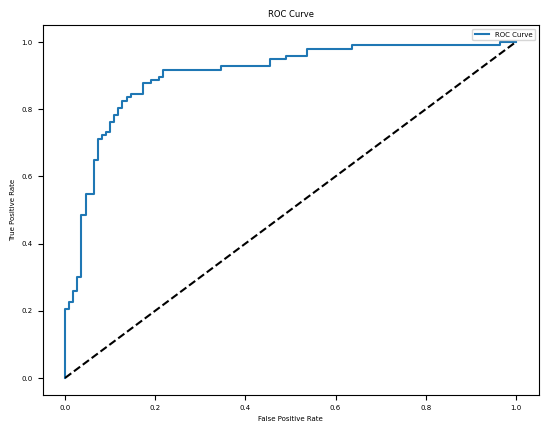

[       inf 0.99219289 0.92529123 0.9197819  0.91447924 0.9114681
 0.90780771 0.90533887 0.90174691 0.89836306 0.83874649 0.83787916
 0.82995412 0.8290805  0.80338872 0.79652699 0.78282477 0.77332934
 0.77012502 0.76365498 0.76305117 0.74779849 0.73770705 0.73665055
 0.71886347 0.6729327  0.65502237 0.65500926 0.65030909 0.64628234
 0.64271418 0.62334642 0.61090452 0.58078639 0.57412058 0.55242656
 0.5449807  0.5199622  0.5034878  0.48912474 0.44721539 0.1292363
 0.12452786 0.07100479 0.07027781 0.06344346 0.0616877  0.05548488
 0.05385375 0.04759956 0.04745049 0.01696264 0.01252236 0.00659116]


In [19]:
import sklearn.metrics as metrics

# CALCULATE THE FPR AND TPR FOR ALL THRESHOLDS OF THE CLASSIFICATION
# <Your code here>
y_scores = model.predict_proba(features_test_scaled)[:, 1]
fpr, tpr, thresholds = roc_curve(target_test, y_scores)
roc_auc = metrics.auc(fpr, tpr)
# method to plot ROC Curve
# <Your code here>
plt.plot(fpr, tpr, label = "ROC Curve")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()   

print(thresholds)

## <span style="color:red">*Q7. Can you code a similar model for random forest?*</span>

In [20]:
# Import the required classifier
from sklearn.ensemble import RandomForestClassifier        # <Your code here>

# Instantiate a RandomForestClassifier with default parameters
rf = RandomForestClassifier(n_estimators= 100, random_state= 42) # <Your code here>

# Fit the model on the training data
rf.fit(features_train_scaled, target_train)# <Your code here>

# Re-instantiate the RandomForestClassifier with 200 trees
rf = RandomForestClassifier(n_estimators = 100, random_state = 42)    # <Your code here>

# Fit the model again on the training data
rf.fit(features_train_scaled, target_train)# <Your code here>

# Predict the test set labels
y_pred = rf.predict(features_test_scaled)# <Your code here>

# Compute and print the accuracy on test data
accuracy = rf.score(features_test_scaled, target_test)# <Your code here>
print("Accuracy of random forest classifier: ",accuracy)# <Your code here>)

Accuracy of random forest classifier:  0.855072463768116


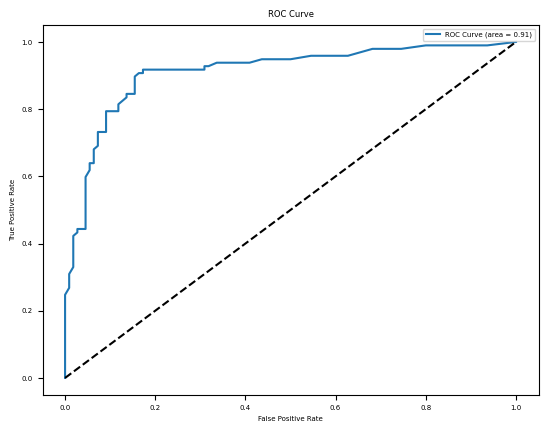

In [21]:
import sklearn.metrics as metrics

# Get the probability predictions for the positive class
probs = rf.predict_proba(features_test_scaled)[:, 1] # <Your code here>   
preds = rf.predict(features_test_scaled)  # <Your code here>

# Compute false positive rate and true positive rate
fpr, tpr, threshold = metrics.roc_curve(target_test, probs) # <Your code here>

# Compute the AUC score
roc_auc = metrics.auc(fpr, tpr) # <Your code here>

# Plot ROC Curve
import matplotlib.pyplot as plt
plt.plot(fpr, tpr, label='ROC Curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

# <Your code here>